<a href="https://colab.research.google.com/github/yuhui-0611/ESAA/blob/main/ESAA_WEEK07_2_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part1: Exploratory Data Analysis(EDA)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/ESAA/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


## How many Survived??

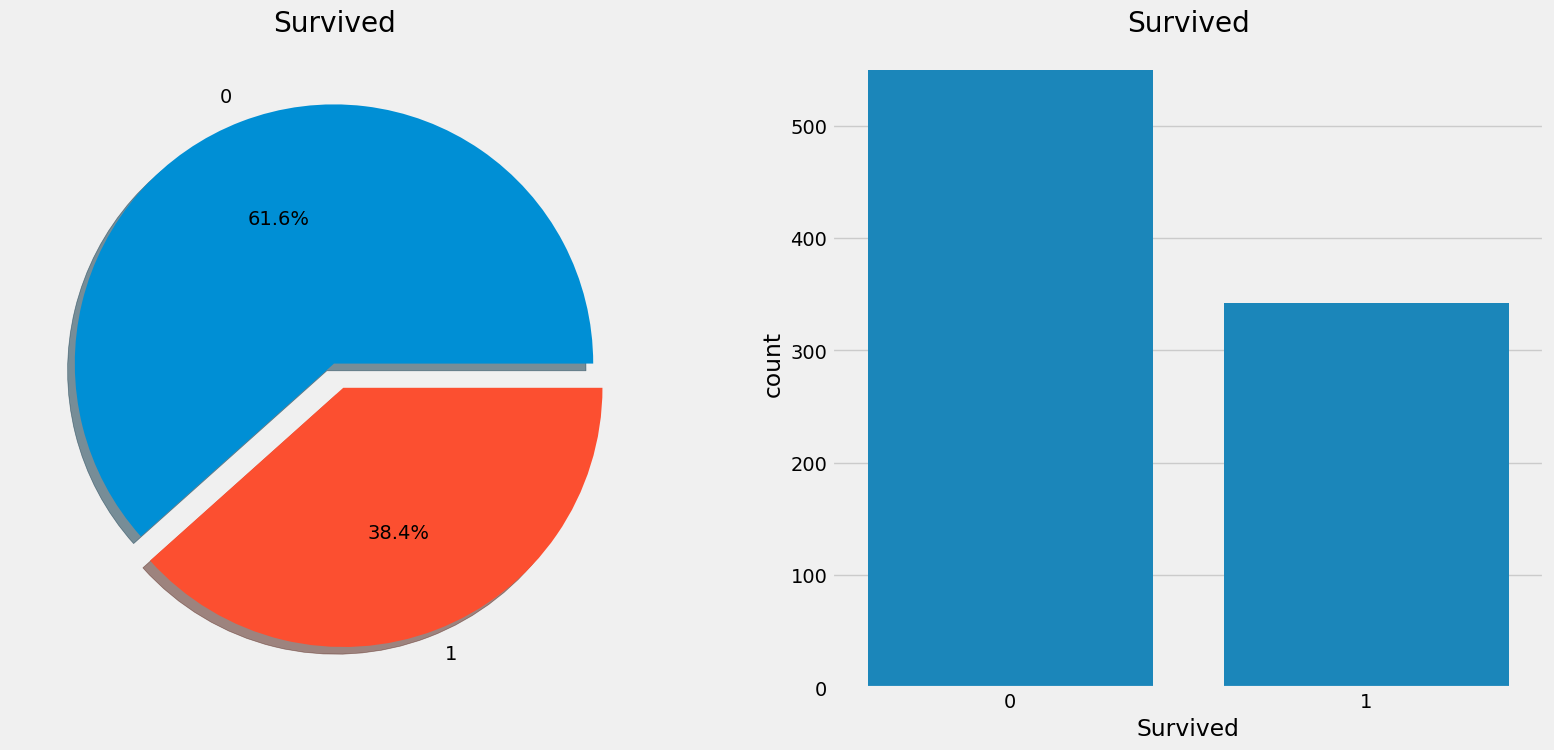

In [5]:
f, ax = plt.subplots(1, 2, figsize = (18,8))
data['Survived'].value_counts().plot.pie(explode = [0,0.1], autopct = '%1.1f%%', ax = ax[0], shadow = True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot(x = 'Survived', data = data, ax = ax[1])
ax[1].set_title('Survived')
plt.show()

- 0 : 사망, 1 : 생존
- 891명의 승객 중 350명만이 생존 -> 38.4% 생존

## Types Of Features

**범주형 : Sex, Embarked**

**순서형 : Pclass(객실 등급)**

**연속형 : Age**

### Sex --> Categorical Feature

In [6]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

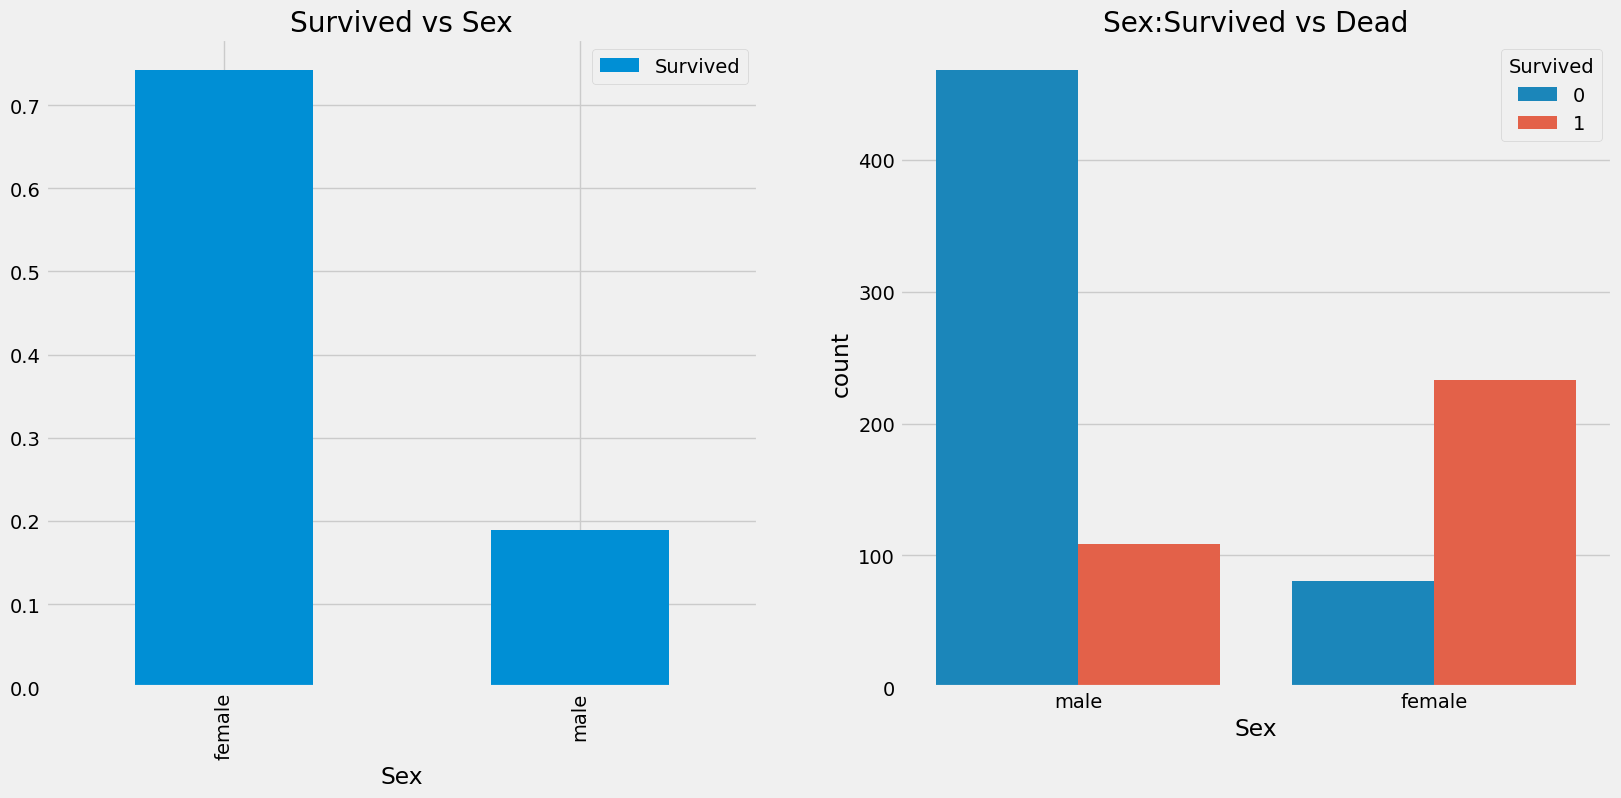

In [7]:
f,ax = plt.subplots(1, 2, figsize = (18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax = ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x = 'Sex',hue = 'Survived',data = data,ax = ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

- 배에 탑승한 남성의 수가 여성보다 훨씬 많았음에도 생존한 여성의 수는 생존한 남성의 약 두배

### Pclass --> Ordinal Feature

In [8]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


pd.crosstab() = 두 개 이상의 범주형 변수 간의 교차표(빈도표)를 만드는 Pandas 함수
> 각 조합이 데이터 안에서 몇 번 나타나는지(빈도) 계산해주는 함수

margins=True
> 행과 열의 총합(Total) 을 마지막 행/열에 추가

cmap='summer_r'
> 색상 맵(color map)을 'summer'로 지정하되, 뒤의 _r은 색상 반전(reverse)을 의미

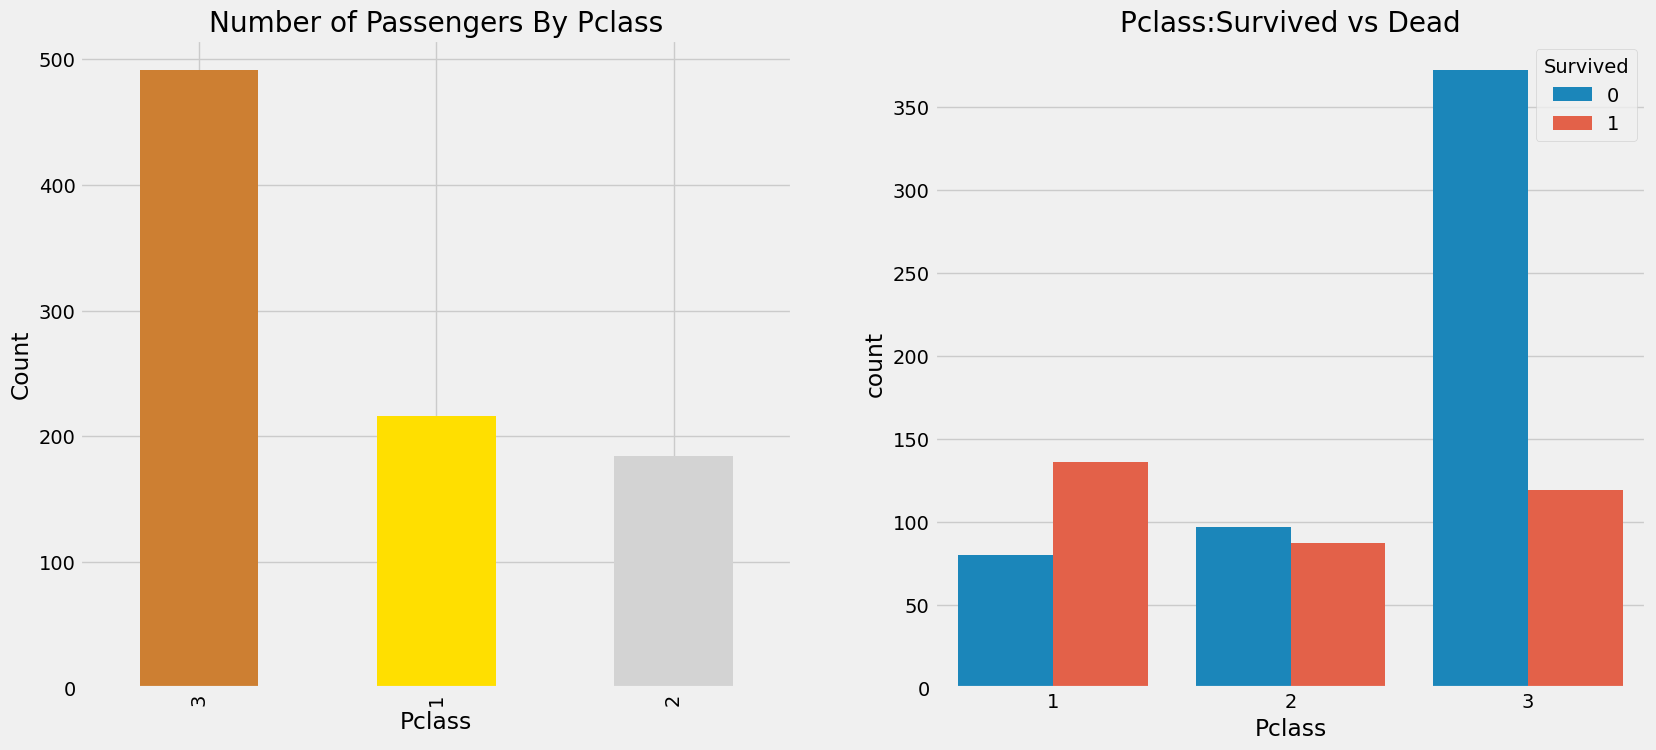

In [9]:
f,ax = plt.subplots(1, 2, figsize = (18,8))
data['Pclass'].value_counts().plot.bar(color = ['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot(x = 'Pclass', hue = 'Survived', data = data, ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

- 1등석 승객들이 구조 과정에서 우선순위를 부여받았음을 알 수 있음
- 3등석 승객의 수가 훨씬 많지만, 생존자 수는 낮아 25% 수준임
- 1등석 승객의 생존률은 약 63%, 2등석 승객의 생존률은 약 48%
- 돈과 사회적 지위가 생존 확률에 영향을 미침

In [10]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

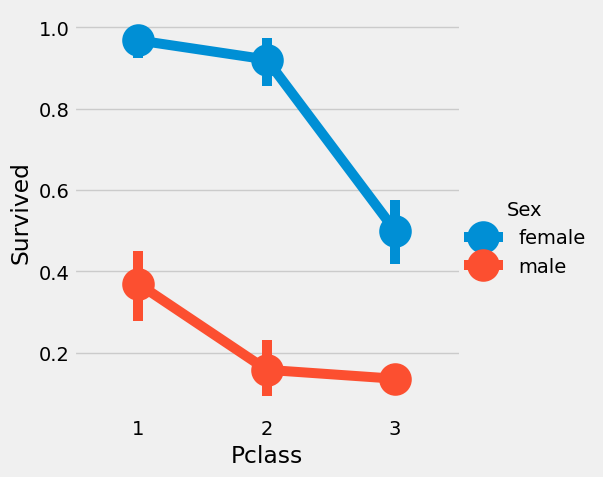

In [11]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=data, kind='point')
plt.show()

sns.catplot() = barplot, boxplot, violinplot, stripplot, pointplot 등을 포함하는 범용 함수
> 'kind=' 옵션으로 어떤 형태의 그래프를 그릴지를 정할 수 있음

- 1등석 여성의 생존률 약 95% ~ 96%
- 객실 등급과 관계 없이 여성들은 구조 과정에서 최우선으로 구출되었다는 점을 알 수 있음
- 1등석 남성조차 생존률이 매우 낮음

### Age --> Continous Feature

In [12]:
print('Oldest Passenger was of:', data['Age'].max(), 'Years')
print('Youngest Passenger was of:', data['Age'].min(), 'Years')
print('Average Age on the ship:', data['Age'].mean(), 'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


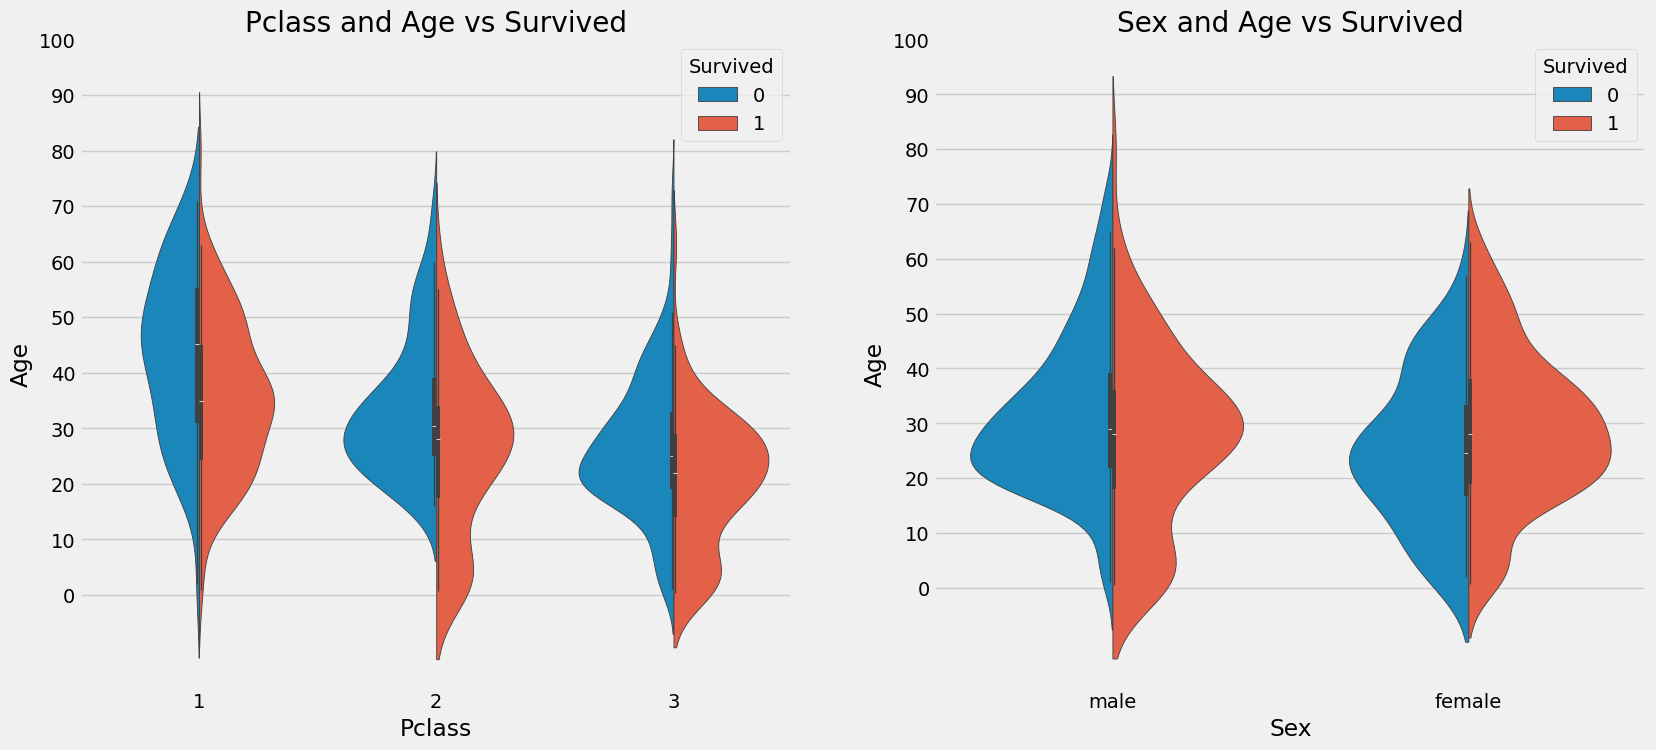

In [13]:
f,ax = plt.subplots(1, 2, figsize=(18,8))
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=data, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot(x="Sex", y="Age", hue="Survived", data=data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

set_yticks() = y축 눈금의 위치를 직접 지정하는 함수
> y축에 어떤 값들을 기준으로 눈금을 표시할지를 수동으로 설정

> range(start, stop, step) 함수 : 정수의 범위를 일정 간격으로 생성

1.  객실 등급(Pclass)이 낮을수록 어린이(children)의 수가 증가하는 경향이 있으며, 나이 10세 이하의 승객들(즉, 어린이)의 생존률은 객실 등급과 관계없이 전반적으로 높음

2.  20세에서 50세 사이의 승객들 중 1등석에 속한 사람들은 생존 확률이 높으며, 특히 여성의 경우 그 확률이 더 높음

3.  남성의 경우에는 나이가 많아질수록 생존 확률이 낮아지는 경향

- 나이 변수에는 177개의 결측값 존재
- 이 결측값을 채우려면 데이터셋의 평균 나이 필요
- 하지만 매우 다양한 연령대의 사람들이 포함되어 있기에 각 승객의 연령대 파악 필요

<해결책>
- 'Name' 변수를 보면, 대부분의 이름에 호칭 포함
- 남성의 경우 Mr., 기혼 여성은 Mrs., 미혼 여성은 Miss., 어린이는 Master. 등의 형태로 표기됨
- 이러한 호칭을 이용해 승객을 그룹화한 뒤, 각 그룹의 평균 나이를 계산

In [14]:
data['Initial']=0
for i in data:
  data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.') # 호칭 추출

[A-Za-z]+ : 알파벳 대문자(A-Z)나 소문자(a-z)가 하나 이상 연속된 문자열 찾기

' \. ' : 그 문자열 바로 뒤에 오는 점 의미

In [15]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap='summer_r')
# checking the Initials with the Sex

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


- misspelled initials like Mile, Mme 대체

In [16]:
data['Initial'].replace(
    ['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
     ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'], inplace=True)

In [17]:
data.groupby('Initial')['Age'].mean()
# 이니셜 별 평균

,Age
Initial,
Master,4.574167
Miss,21.860000
Mr,32.739609
Mrs,35.981818
Other,45.888889


**Filling NaN Ages**

In [18]:
## Assigning the NaN Values with the Ceil values of the mean ages
data.loc[(data.Age.isnull()) & (data.Initial=='Mr'), 'Age'] = 33
data.loc[(data.Age.isnull()) & (data.Initial=='Mrs'), 'Age'] = 36
data.loc[(data.Age.isnull()) & (data.Initial=='Master'), 'Age'] = 5
data.loc[(data.Age.isnull()) & (data.Initial=='Miss'), 'Age'] = 22
data.loc[(data.Age.isnull()) & (data.Initial=='Other'), 'Age'] = 46

In [19]:
data.Age.isnull().any() # 결측 X

np.False_

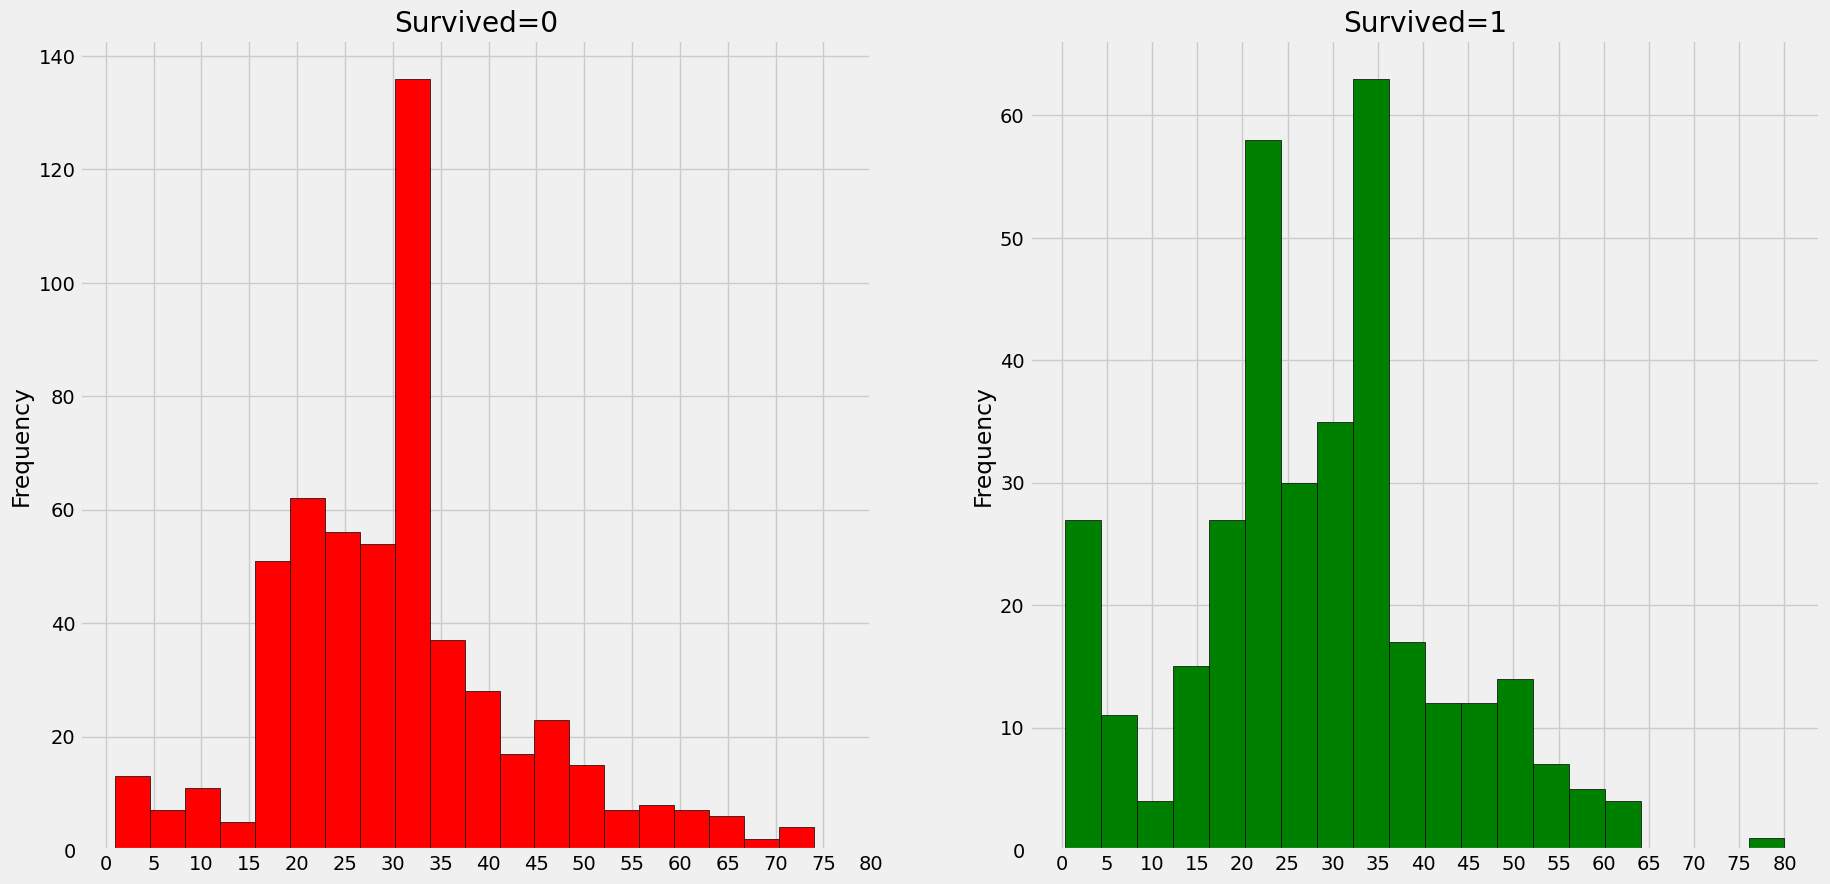

In [20]:
f,ax = plt.subplots(1, 2, figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0], bins=20, edgecolor='black', color='red')
# edgecolor='black' : 도형 외곽선 색상 지정
ax[0].set_title('Survived=0')
x1 = list(range(0, 85, 5))
ax[0].set_xticks(x1)
# xticks : x축 눈금 간격
data[data['Survived']==1].Age.plot.hist(ax=ax[1], color='green', bins=20, edgecolor='black')
ax[1].set_title('Survived=1')
x2 = list(range(0, 85, 5))
ax[1].set_xticks(x2)
plt.show()

1.  유아(5세 미만, toddlers) 는 많은 수가 구조됨 → 이는 여성과 어린이를 우선 구조하라는 원칙에 따른 결과

2.  가장 나이가 많았던 승객(80세) 역시 생존

3.  가장 많은 사망자는 30~40세 연령대에서 발생

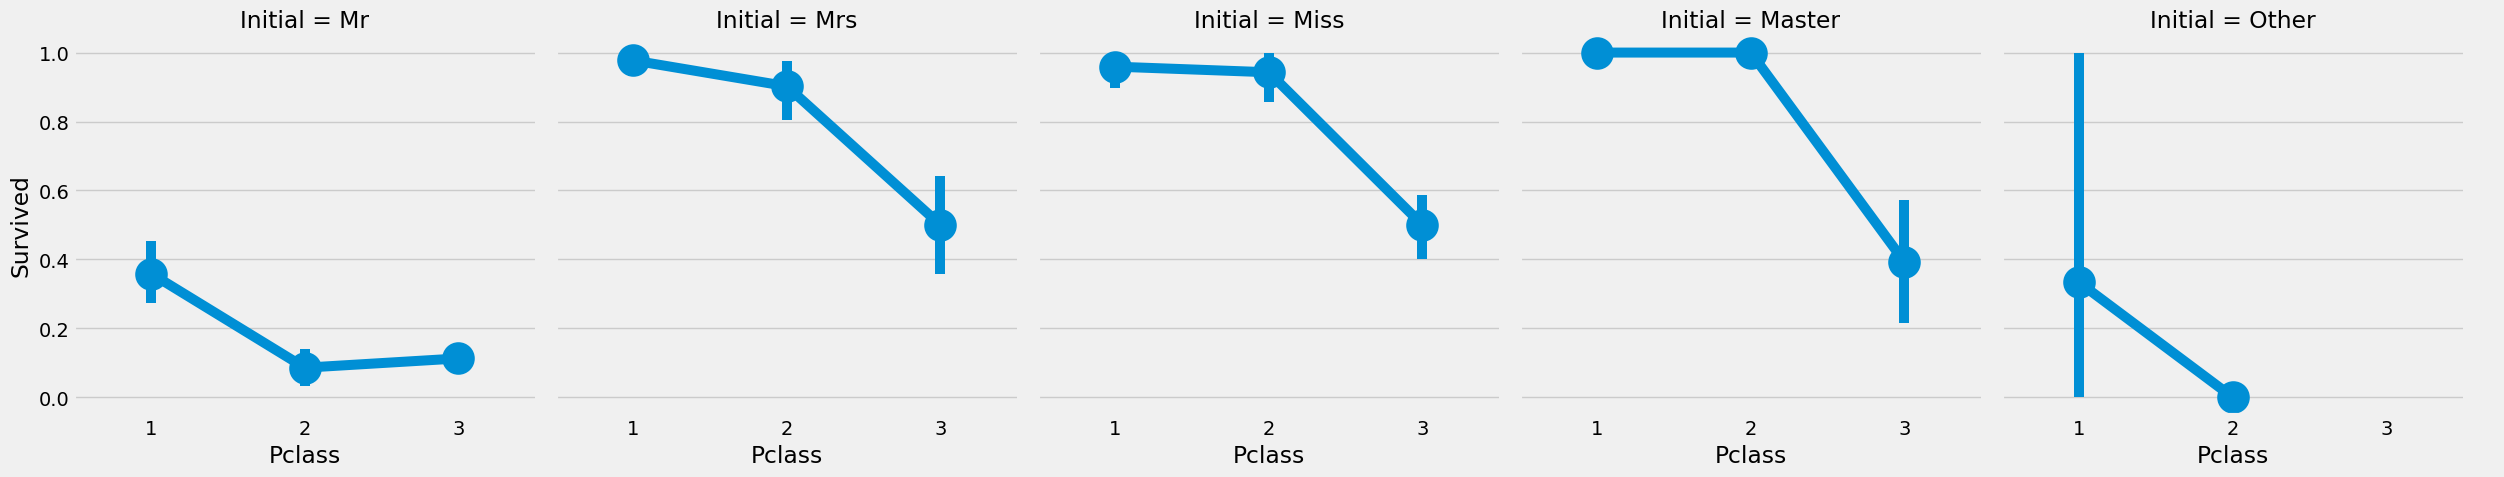

In [21]:
sns.catplot(x='Pclass', y='Survived', col='Initial', data=data, kind='point')
plt.show()

### Embarked --> Categorical Value

In [22]:
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived],
            margins=True).style.background_gradient(cmap = 'summer_r')

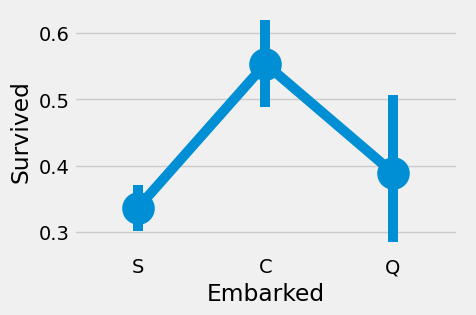

In [23]:
sns.catplot(x='Embarked', y='Survived', data=data, kind='point')
fig = plt.gcf()
# gcf = get current figure의 약자로 현재 활성화된 Figure 객체를 가져오는 함수
fig.set_size_inches(5, 3)
# set_size_inches()는 이미 만들어진 figure의 크기를 나중에 바꿀 때 사용
plt.show()

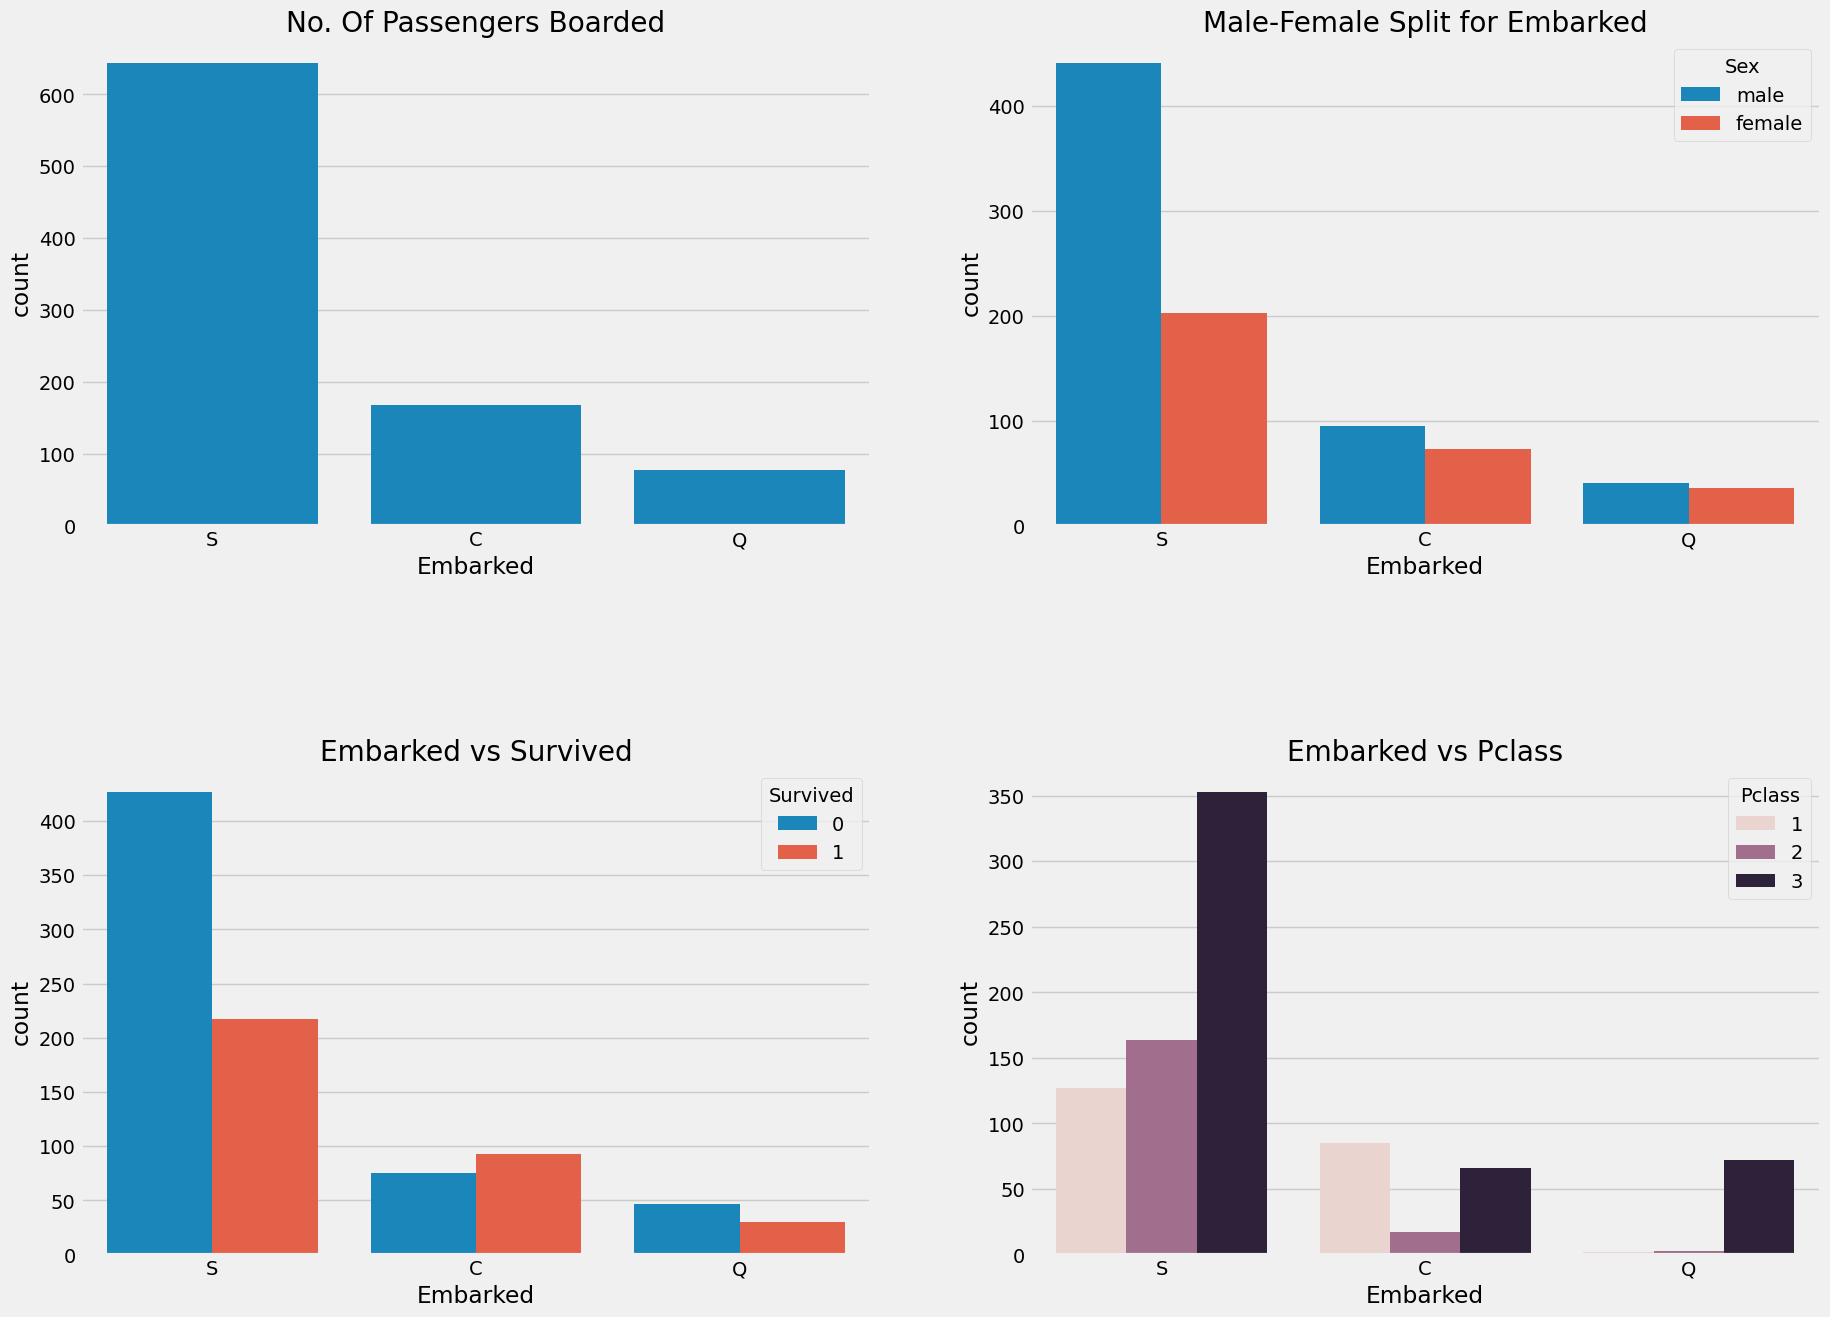

In [24]:
f,ax = plt.subplots(2 ,2, figsize = (20,15))
sns.countplot(x='Embarked', data=data, ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')

sns.countplot(x='Embarked', hue='Sex', data=data, ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')

sns.countplot(x='Embarked', hue='Survived', data=data, ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')

sns.countplot(x='Embarked', hue='Pclass', data=data, ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

1.  S 항구: 탑승자 수가 가장 많았고, 대부분 3등석 → 생존률 낮음

2.  C 항구: 1·2등석 승객이 많아 생존률 높음

3.  Q 항구: 거의 전원이 3등석 → 사회적 지위가 낮은 승객 중심

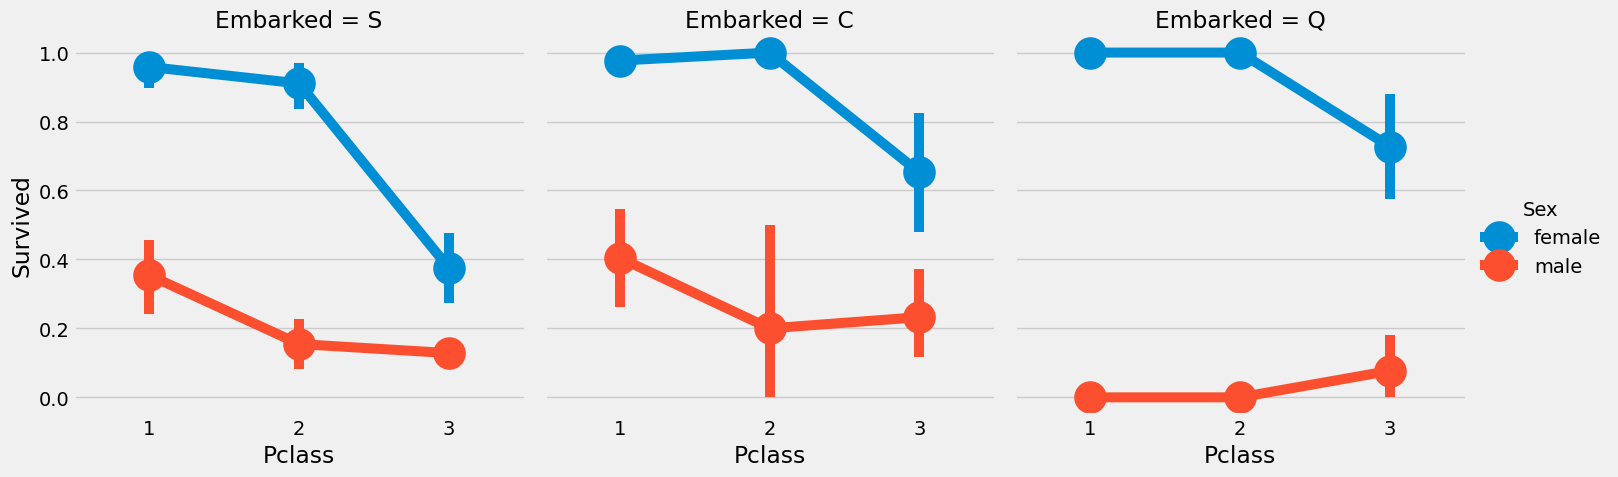

In [25]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', col='Embarked', data=data, kind='point')
plt.show()

1.  여성 + 1·2등석 → 거의 전원 생존

2.  S항 출항 + 3등석 → 생존률 매우 낮음

3.  Q항 출항 + 남성 → 대부분 사망 (3등석 집중)

**Filling Embarked NaN**

대다수의 승객이 S 항구에서 탔기에 S로 NaN 대체

In [26]:
data['Embarked'].fillna('S', inplace=True)

In [27]:
data.Embarked.isnull().any() # 결측 X

np.False_

### SibSip --> Discrete Feature

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife

In [28]:
pd.crosstab([data.SibSp], data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


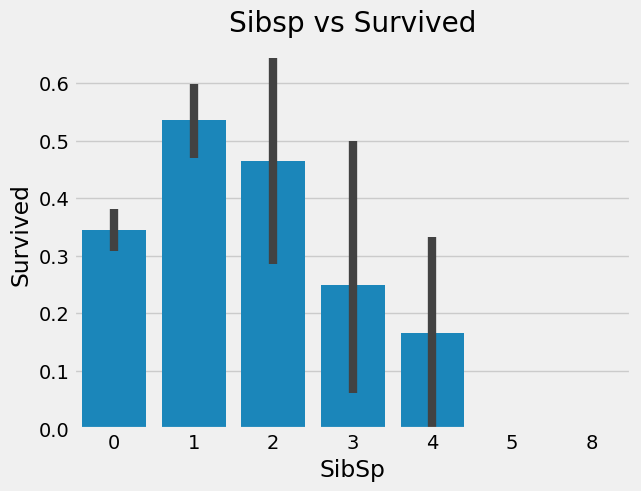

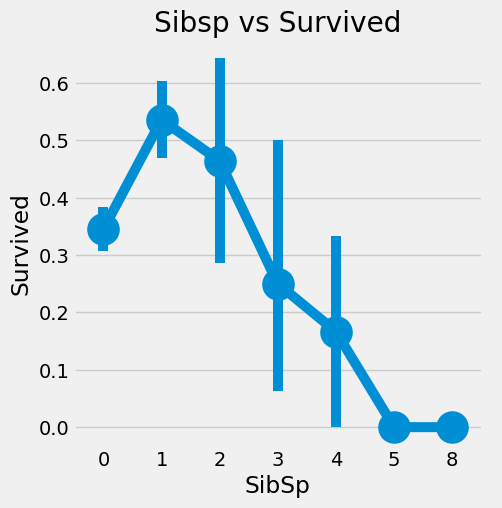

In [29]:
# catplot은 subplot이 Axes 위에 직접 그릴 수 없으므로 subplot 안에 직접 넣을 수 없음
sns.barplot(x='SibSp', y='Survived', data=data)
plt.title('Sibsp vs Survived')

sns.catplot(x='SibSp', y='Survived', data=data, kind='point')
plt.title('Sibsp vs Survived')

plt.show()

In [30]:
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


1.  형제자매가 없을수록 생존 확률이 높음 (약 34.5%)

2.  가족 수가 많아질수록 생존 확률이 급감

3.  5명 이상 가족은 전원 사망 → 대부분 3등석에 탑승

즉, 가족 규모와 객실 등급은 생존률에 결정적인 영향을 미침

### Parch

배 안에 함께 탑승한 부모 또는 자녀의 수

In [31]:
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


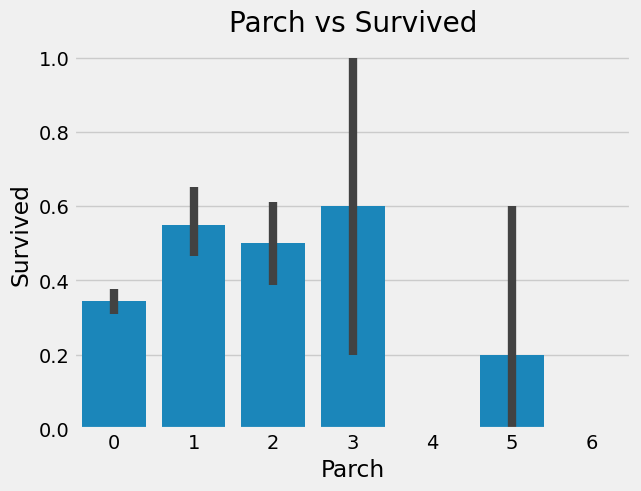

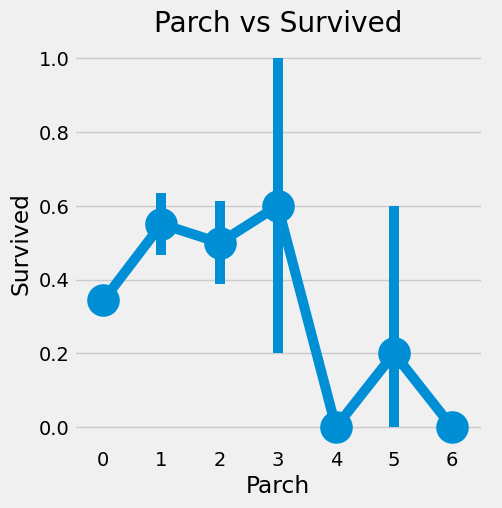

In [32]:
sns.barplot(x='Parch', y='Survived', data=data)
plt.title('Parch vs Survived')

sns.catplot(x='Parch', y='Survived', data=data, kind='point')
plt.title('Parch vs Survived')
plt.show()

### Fare --> Continous Feature

In [33]:
print('Highest Fare was:', data['Fare'].max())
print('Lowest Fare was:', data['Fare'].min())
print('Average Fare was:', data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.204207968574636


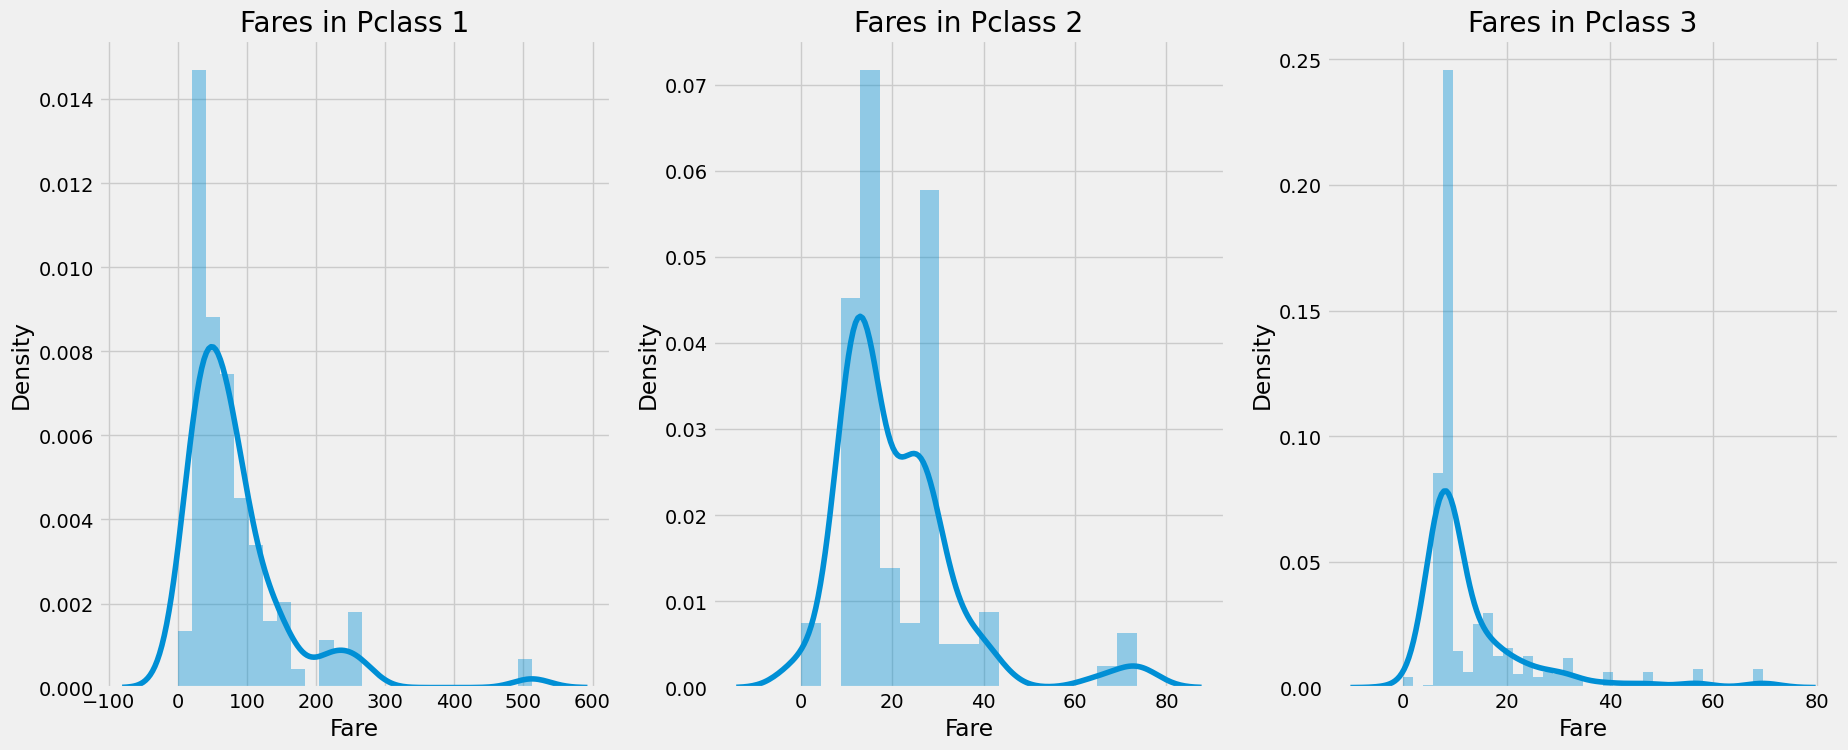

In [34]:
f,ax = plt.subplots(1,3, figsize=(20,8))

sns.distplot(data[data['Pclass']==1].Fare, ax=ax[0])
ax[0].set_title('Fares in Pclass 1')

sns.distplot(data[data['Pclass']==2].Fare, ax=ax[1])
ax[1].set_title('Fares in Pclass 2')

sns.distplot(data[data['Pclass']==3].Fare, ax=ax[2])
ax[2].set_title('Fares in Pclass 3')

plt.show()

distplot() = 히스토그램과 커널 밀도 추정선(KDE: Kernel Density Estimate)을 한 번에 그려주는 함수

- 1등석 승객의 요금은 다양하고, 등급이 낮을수록 요금 분포 폭이 줄어듦

- Fare는 연속형 변수이므로, 이를 분석에 활용하기 쉽게 구간화하여 이산형 변수로 변환 가능

## Correlation Between The Features

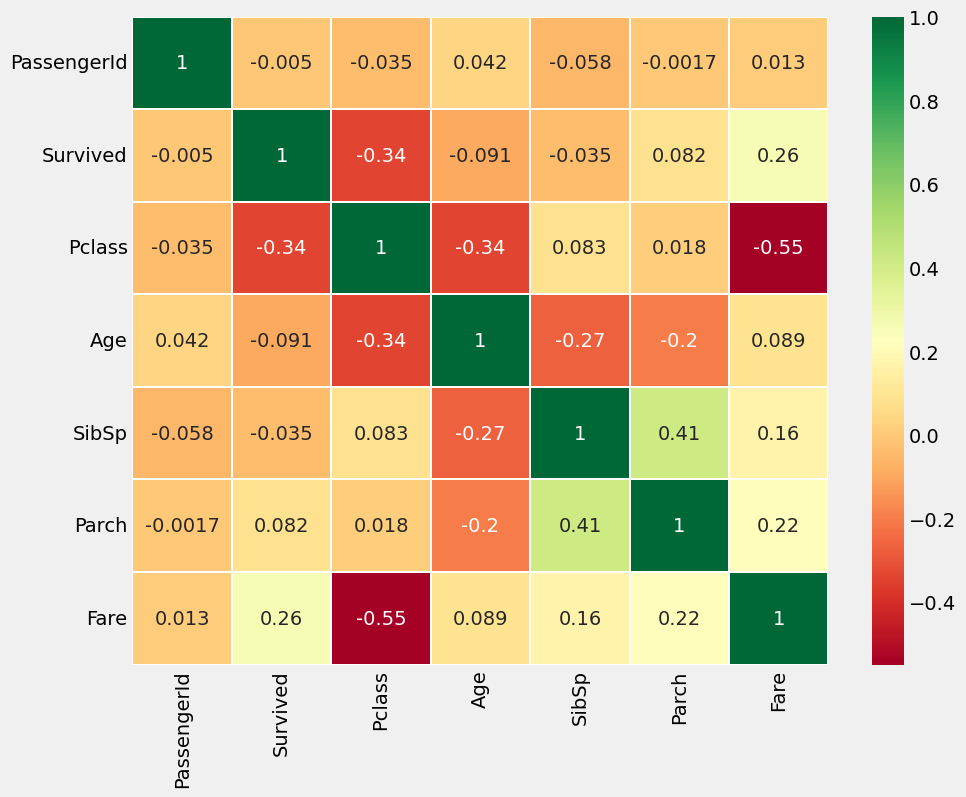

In [35]:
cols = ['PassengerId','Survived','Pclass','Age','SibSp','Parch','Fare']
sns.heatmap(data[cols].corr(), annot=True, cmap='RdYlGn', linewidth=0.2)
# annot=True : 그래프 안 숫자 표시
# data.corr() --> correlation matrix

fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

- 숫자형 변수만 상관분석 가능 (문자형 변수는 불가능)

- +1 → 완전한 양의 상관, -1 → 완전한 음의 상관

- 높은 상관 → 정보 중복 → 다중공선성(MultiCollinearity) 발생

- 히트맵 결과: 상관도가 낮음 → 모든 변수 유지 가능

- 가장 높은 상관: SibSp ↔ Parch (0.41)

히트맵에서 변수 간 상관관계가 전반적으로 낮으므로,
모든 변수를 모델 학습에 사용 가능

# Part2: Feature Engineering and Data Cleaning

- Feature Engineering: 새로운 변수 생성 + 불필요한 변수 제거 + 적절한 형태로 변환

- Age 문제점: 연속형이라 모델이 패턴 인식 어려움

- 해결책: 비닝(Binning)으로 나이 범위를 구간화

- 결과: 0-80세를 5개 구간(16세 간격)으로 나누어 범주형 변수 Age_band 생성

In [36]:
data['Age_band'] = 0
data.loc[data['Age'] <= 16, 'Age_band'] = 0
data.loc[(data['Age'] > 16) & (data['Age'] <= 32), 'Age_band'] = 1
data.loc[(data['Age'] > 32) & (data['Age'] <= 48), 'Age_band'] = 2
data.loc[(data['Age'] > 48) & (data['Age'] <= 64), 'Age_band'] = 3
data.loc[data['Age'] > 64, 'Age_band'] = 4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [37]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')
# checking the number of passengers in each band

,count
Age_band,
1,382
2,325
0,104
3,69
4,11


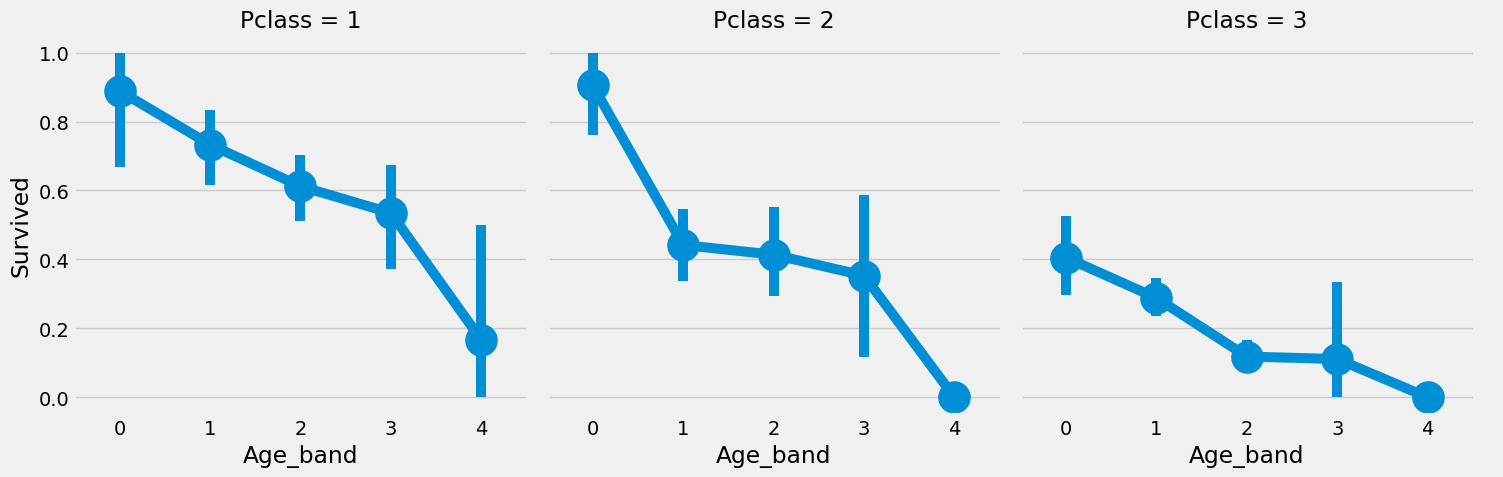

In [38]:
sns.catplot(x='Age_band', y='Survived', data=data, col='Pclass', kind='point')
plt.show()

### Family_Size and Alone

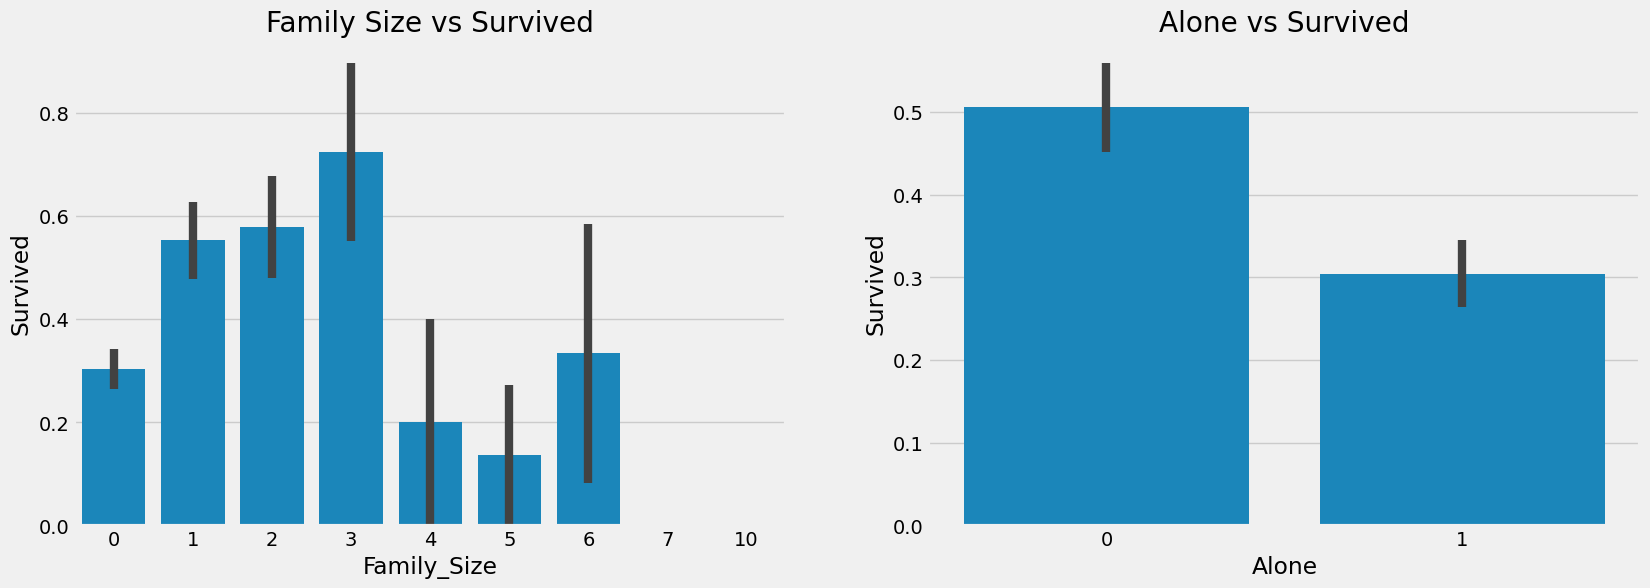

In [39]:
# family size
data['Family_Size'] = 0
data['Family_Size'] = data['Parch'] + data['SibSp']

# Alone
data['Alone'] = 0
data.loc[data.Family_Size==0, 'Alone'] = 1  # 조건(Family_Size == 0)을 만족하는 행의 'Alone' 열에 1 저장


f,ax = plt.subplots(1, 2, figsize = (18,6))

sns.barplot(x='Family_Size', y='Survived', data=data, ax=ax[0])
ax[0].set_title('Family Size vs Survived')

sns.barplot(x='Alone', y='Survived', data=data, ax=ax[1])
ax[1].set_title('Alone vs Survived')

plt.close(2)
plt.close(3)
plt.show()

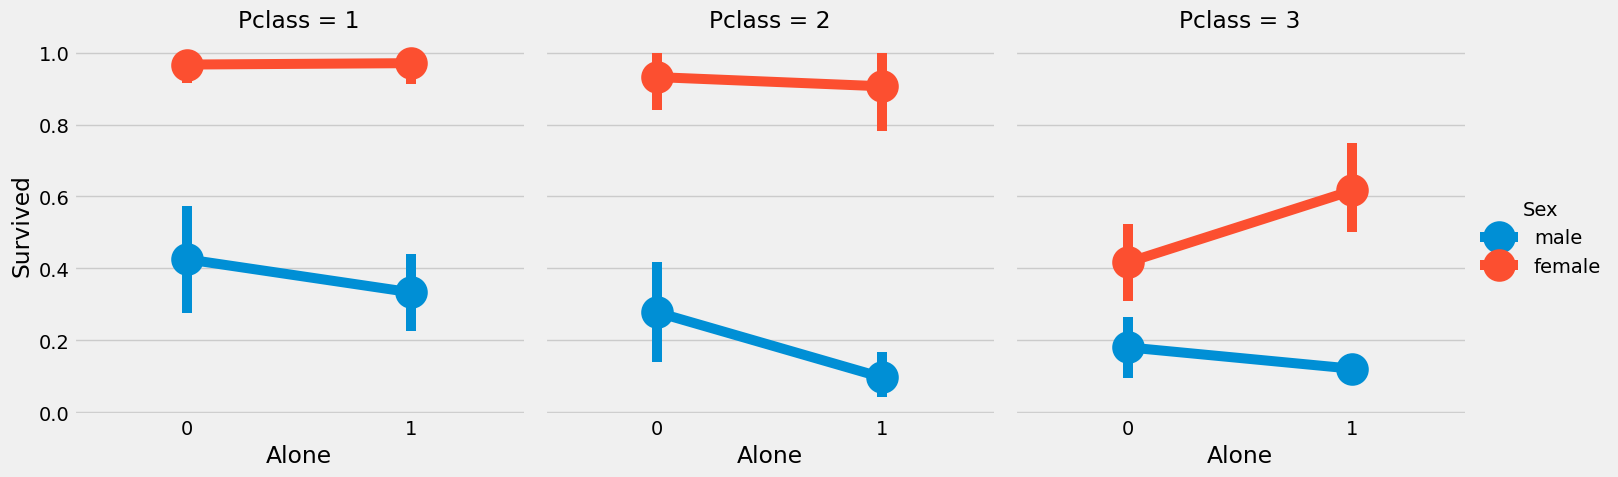

In [40]:
sns.catplot(x='Alone', y='Survived', data=data, hue='Sex', col='Pclass', kind='point')
plt.show()

- 대부분의 경우: 혼자일수록 생존 확률 ↓
- 예외: 3등석 여성 → 혼자일 때 오히려 생존 확률 ↑

### Fare_Range

- Fare는 연속형 변수 → 순서형으로 변환 필요

- pd.qcut() = 데이터를 값의 순서(분포)에 따라 균등하게 구간화
> 예: qcut(..., 5) → 데이터 전체를 5개의 분위수 구간(quintiles) 으로 나눔

In [41]:
data['Fare_Range'] = pd.qcut(data['Fare'], 4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [42]:
data['Fare_cat'] = 0
data.loc[data['Fare'] <= 7.91, 'Fare_cat'] = 0
data.loc[(data['Fare'] > 7.91) & (data['Fare'] <= 14.454), 'Fare_cat'] = 1
data.loc[(data['Fare'] > 14.454) & (data['Fare'] <= 31), 'Fare_cat'] = 2
data.loc[(data['Fare'] > 31) & (data['Fare'] <= 513), 'Fare_cat'] = 3

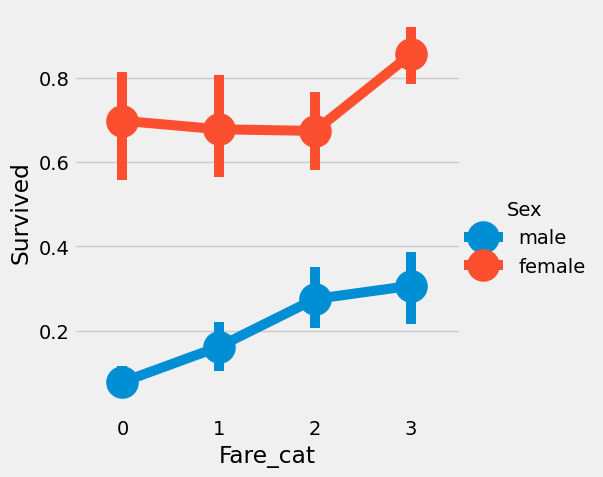

In [43]:
sns.catplot(x='Fare_cat', y='Survived', data=data, hue='Sex', kind='point')
plt.show()

### Converting String Values into Numeric

In [44]:
data['Sex'].replace(['male','female'], [0,1], inplace=True)
data['Embarked'].replace(['S','C','Q'], [0,1,2], inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'], [0,1,2,3,4], inplace=True)

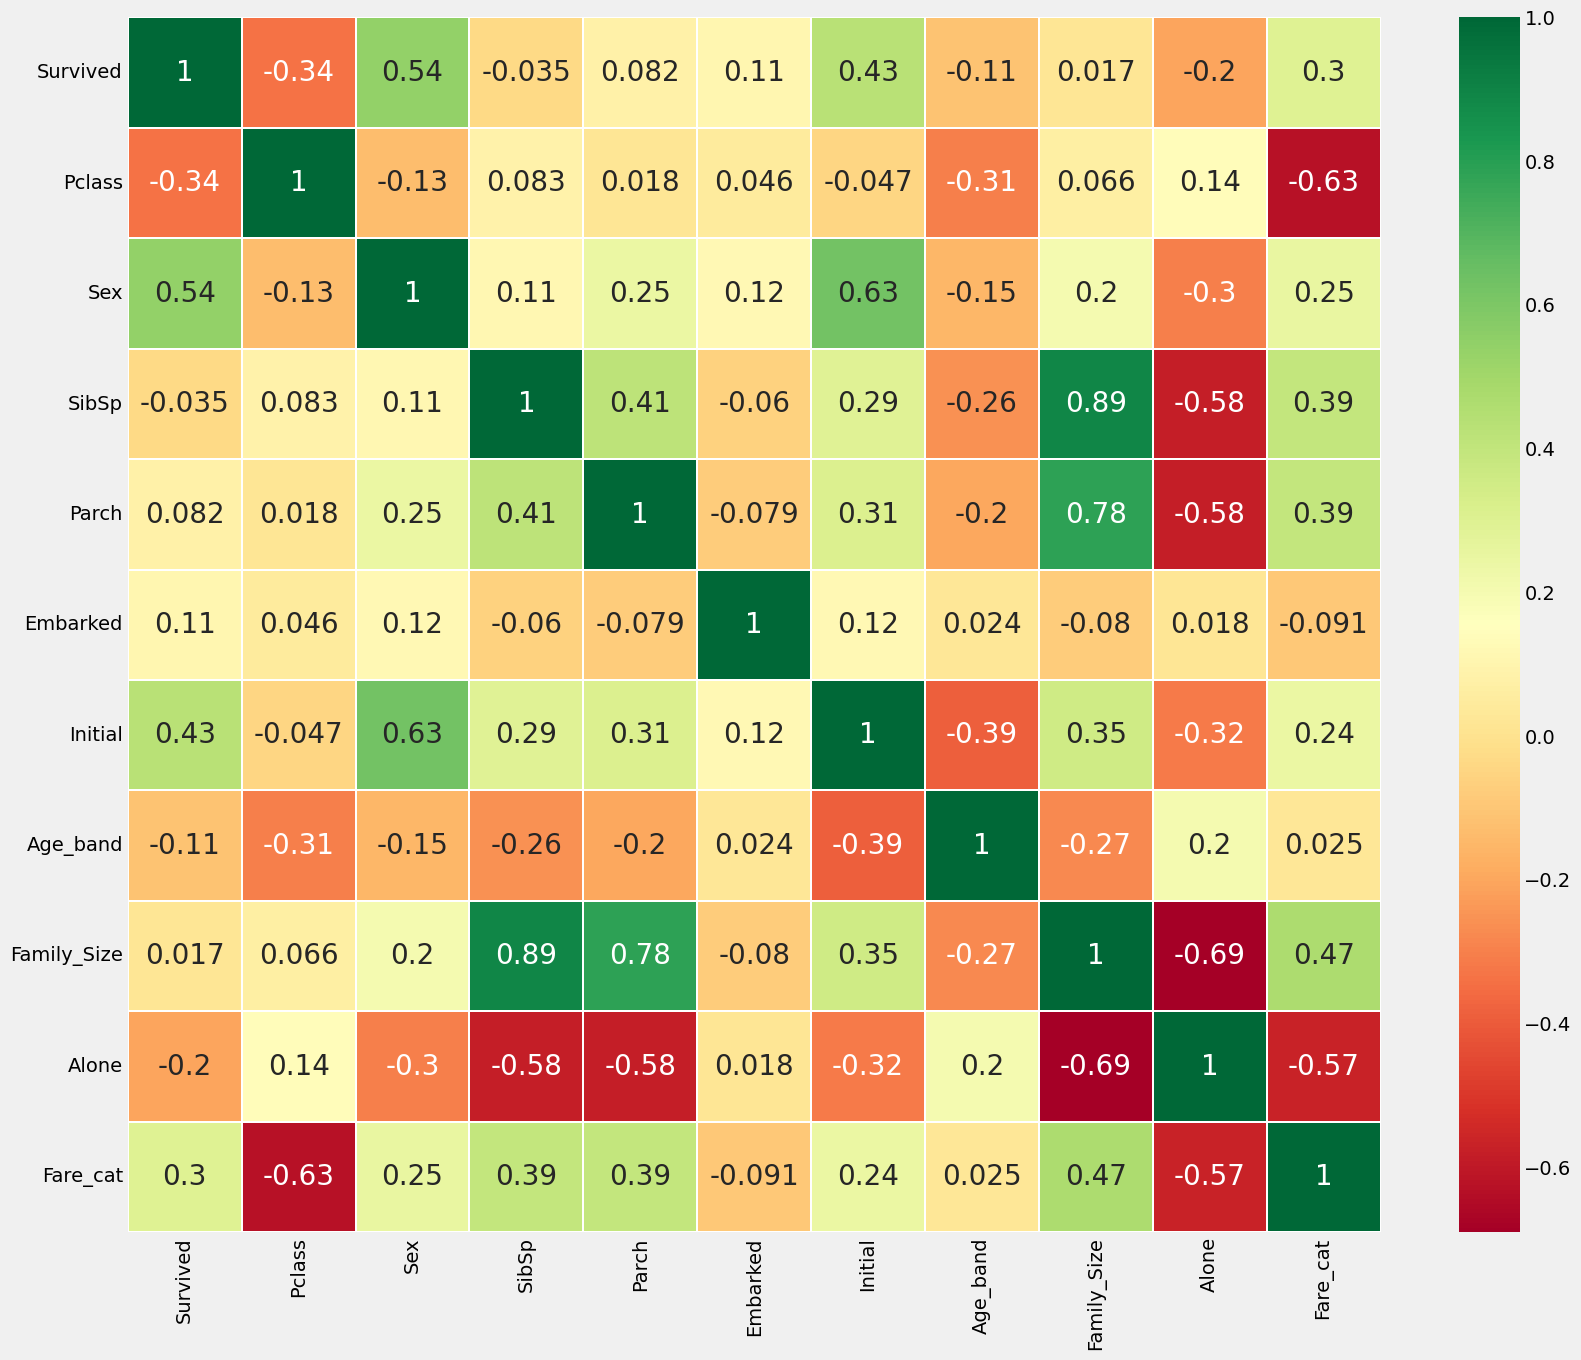

In [45]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'], axis=1, inplace=True)
sns.heatmap(data.corr(), annot = True, cmap='RdYlGn', linewidths=0.2, annot_kws={'size':20})
fig = plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# Part3: Predictive Modeling

In [46]:
# importing all the required ML packages
from sklearn.linear_model import LogisticRegression # logistic regression
from sklearn import svm # support vector Machine
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.naive_bayes import GaussianNB # Naive bayes
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.model_selection import train_test_split # training and testing data split
from sklearn import metrics # accuracy measure
from sklearn.metrics import confusion_matrix # for confusion matrix

In [47]:
train, test = train_test_split(data, test_size=0.3, random_state=0, stratify = data['Survived'])
train_X = train[train.columns[1:]]  # 두번째 열부터 끝까지 = 생존 여부 제외
train_Y = train[train.columns[:1]]  # 첫번째 열만 선택 = 생존 여부
test_X = test[test.columns[1:]]
test_Y = test[test.columns[:1]]
X = data[data.columns[1:]]
Y = data['Survived']

## **Radial Support Vector Machines(rbf-SVM)**

In [48]:
model = svm.SVC(kernel = 'rbf', C=1, gamma=0.1)
model.fit(train_X, train_Y)
prediction1 = model.predict(test_X)
print('Accuracy for rbf SVM is', metrics.accuracy_score(prediction1, test_Y))

Accuracy for rbf SVM is 0.835820895522388


- 커널함수 : 데이터를 고차원 공간으로 매핑하여 비선형 분류를 가능하게 함

> C=1 : 오차 허용 정도 조절 > 값이 클수록 모델이 학습 데이터에 더 민감(과적합 위험 ↑)

> 한 데이터 포인트가 미치는 영향 범위 > 작을수록 부드럽게, 클수록 모델이 복잡해짐

## **Linear Support Vector Machine(linear-SVM)**

In [49]:
model = svm.SVC(kernel = 'linear', C=0.1, gamma=0.1)
model.fit(train_X, train_Y)
prediction2 = model.predict(test_X)
print('Accuracy for linear SVM is', metrics.accuracy_score(prediction2, test_Y))

Accuracy for linear SVM is 0.8171641791044776


## **Logistic Regression**

In [50]:
model = LogisticRegression()
model.fit(train_X, train_Y)
prediction3 = model.predict(test_X)
print('The accuraccy of the Logistic Regression is', metrics.accuracy_score(prediction3, test_Y))

The accuraccy of the Logistic Regression is 0.8134328358208955


## **Decision Tree**

In [51]:
model = DecisionTreeClassifier()
model.fit(train_X, train_Y)
prediction4 = model.predict(test_X)
print('The accuracy of the Decision Tree is', metrics.accuracy_score(prediction4, test_Y))

The accuracy of the Decision Tree is 0.8059701492537313


## **K-Nearest Neighbours(KNN)**

In [52]:
model = KNeighborsClassifier()
model.fit(train_X, train_Y)
prediction5 = model.predict(test_X)
print('The accuracy of the KNN is', metrics.accuracy_score(prediction5, test_Y))

The accuracy of the KNN is 0.8134328358208955


In [53]:
a_index = list(range(1, 11))
a = pd.Series()
x = [0,1,2,3,4,5,6,7,8,9,10]

for i in list(range(1, 11)):
  model = KNeighborsClassifier(n_neighbors = i)
  model.fit(train_X, train_Y)
  prediction = model.predict(test_X)
  a = pd.concat([a, pd.Series([metrics.accuracy_score(prediction, test_Y)])], ignore_index=True)
  # pd.concat([a, ...]) → 기존 a라는 Series에 새 정확도를 아래로 이어붙임

print(a)

0    0.731343
1    0.761194
2    0.794776
3    0.805970
4    0.813433
5    0.802239
6    0.828358
7    0.832090
8    0.847015
9    0.828358
dtype: float64


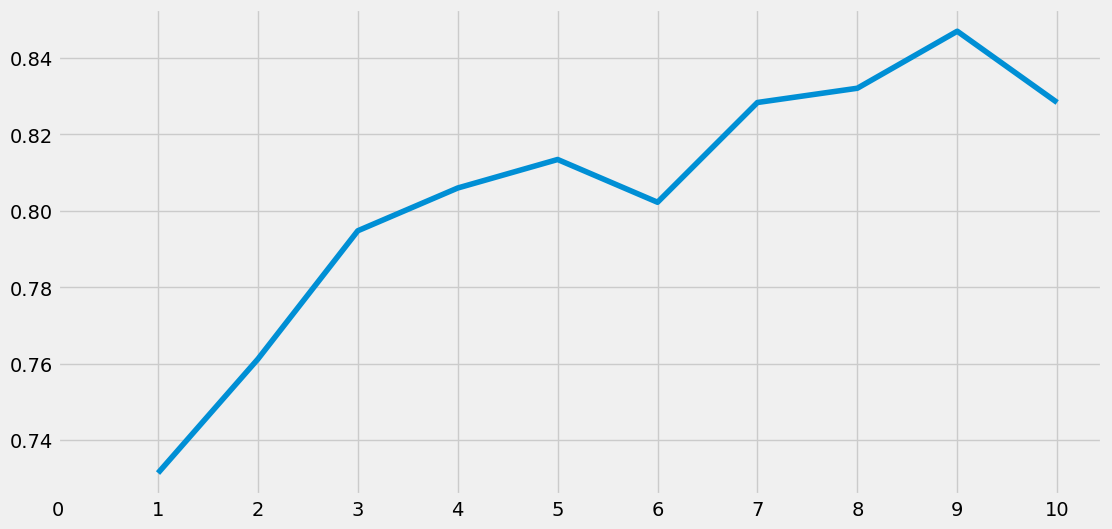

Accuracies for different values of n are: [0.73134328 0.76119403 0.79477612 0.80597015 0.81343284 0.80223881
 0.82835821 0.83208955 0.84701493 0.82835821] with the max value as 0.8470149253731343


In [54]:
plt.plot(a_index, a)
plt.xticks(x)
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:', a.values,'with the max value as', a.values.max())

## **Gaussian Naive Bayes**

In [55]:
model = GaussianNB()
model.fit(train_X, train_Y)
prediction6 = model.predict(test_X)
print('The accuracy of the NaiveBayes is', metrics.accuracy_score(prediction6, test_Y))

The accuracy of the NaiveBayes is 0.8134328358208955


## **Random Forests**

In [56]:
model = RandomForestClassifier(n_estimators = 100)
model.fit(train_X, train_Y)
prediction7 = model.predict(test_X)
print('The accuracy of the Random Forests is', metrics.accuracy_score(prediction7, test_Y))

The accuracy of the Random Forests is 0.8171641791044776


- 단순한 '정확도 90%'만으로 모델의 안정성을 판단할 수 없음

- 데이터가 바뀌면 성능이 달라질 수 있으므로, 교차 검증(Cross Validation)을 통해 일반화된 모델 성능을 평가해야 함

### Cross Validation

K-Fold 교차 검증은 데이터를 여러 부분으로 나누어 모든 샘플이 한 번씩은 테스트에 사용되도록 하여, 데이터 불균형과 과적합 문제를 줄이고, 일반화된 모델을 만드는 방법

In [57]:
from sklearn.model_selection import KFold # for K-fold cross validation
from sklearn.model_selection import cross_val_score # score evaluation
from sklearn.model_selection import cross_val_predict # prediction

kfold = KFold(n_splits=10, shuffle=True, random_state=22) # k=10, split the data into 10 equal parts
# shuffle=False가 기본값이기에 데이터가 원래 순서대로 나뉨
# 데이터에 순서가 있을 때, 이 순서가 그대로 유지되면 특정 Fold가 편향될 수 있기에 무작위로 섞어야 함
xyz = []
accuracy = []
std = []
classifiers = ['Linear Svm', 'Radial Svm', 'Logistic Regression', 'KNN', 'Decision Tree',
               'Naive Bayes', 'Random Forest']
models = [svm.SVC(kernel = 'linear'), svm.SVC(kernel = 'rbf'),
          LogisticRegression(), KNeighborsClassifier(n_neighbors=9), DecisionTreeClassifier(),
          GaussianNB(), RandomForestClassifier(n_estimators=100)]

for i in models:
  model = i
  cv_result = cross_val_score(model, X, Y, cv = kfold, scoring='accuracy')
  cv_result = cv_result
  xyz.append(cv_result.mean())
  std.append(cv_result.std())
  accuracy.append(cv_result)
new_models_dataframe2 = pd.DataFrame({'CV Mean':xyz, 'Std':std}, index=classifiers)
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.784607,0.057841
Radial Svm,0.828377,0.057096
Logistic Regression,0.799176,0.040154
KNN,0.808140,0.035630
Decision Tree,0.805855,0.043433
Naive Bayes,0.795843,0.054861
Random Forest,0.813745,0.047986


<Axes: >

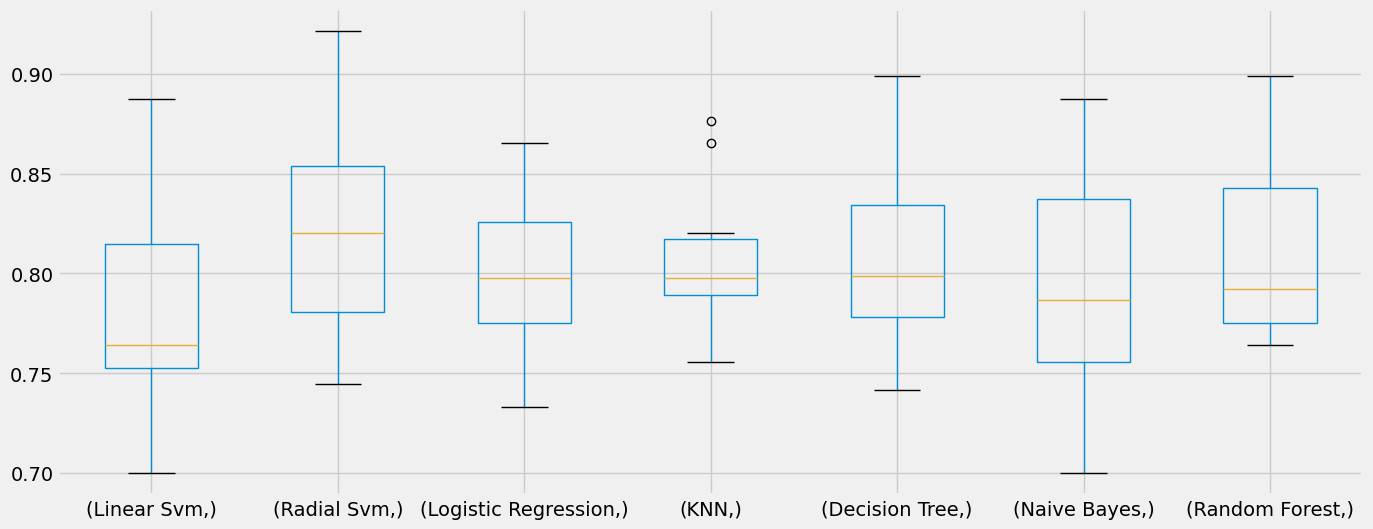

In [72]:
plt.subplots(figsize = (15,6))
box = pd.DataFrame(accuracy, index = [classifiers])
box.T.boxplot()

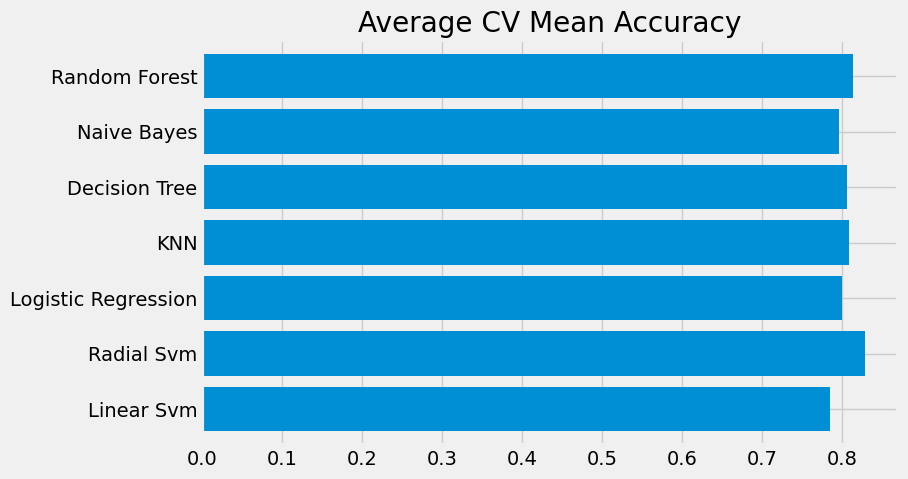

In [59]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

- 불균형 데이터에서는 단순 정확도만으로 모델을 평가하기 어려움 > **혼동 행렬 이용**

- Confusion Matrix(혼동 행렬)는 각 클래스별로 맞춘 부분과 틀린 부분을 시각적으로 보여주어 모델이 어떤 클래스에서 오분류를 하는지를 확인할 수 있는 도구

### Confusion Matrix

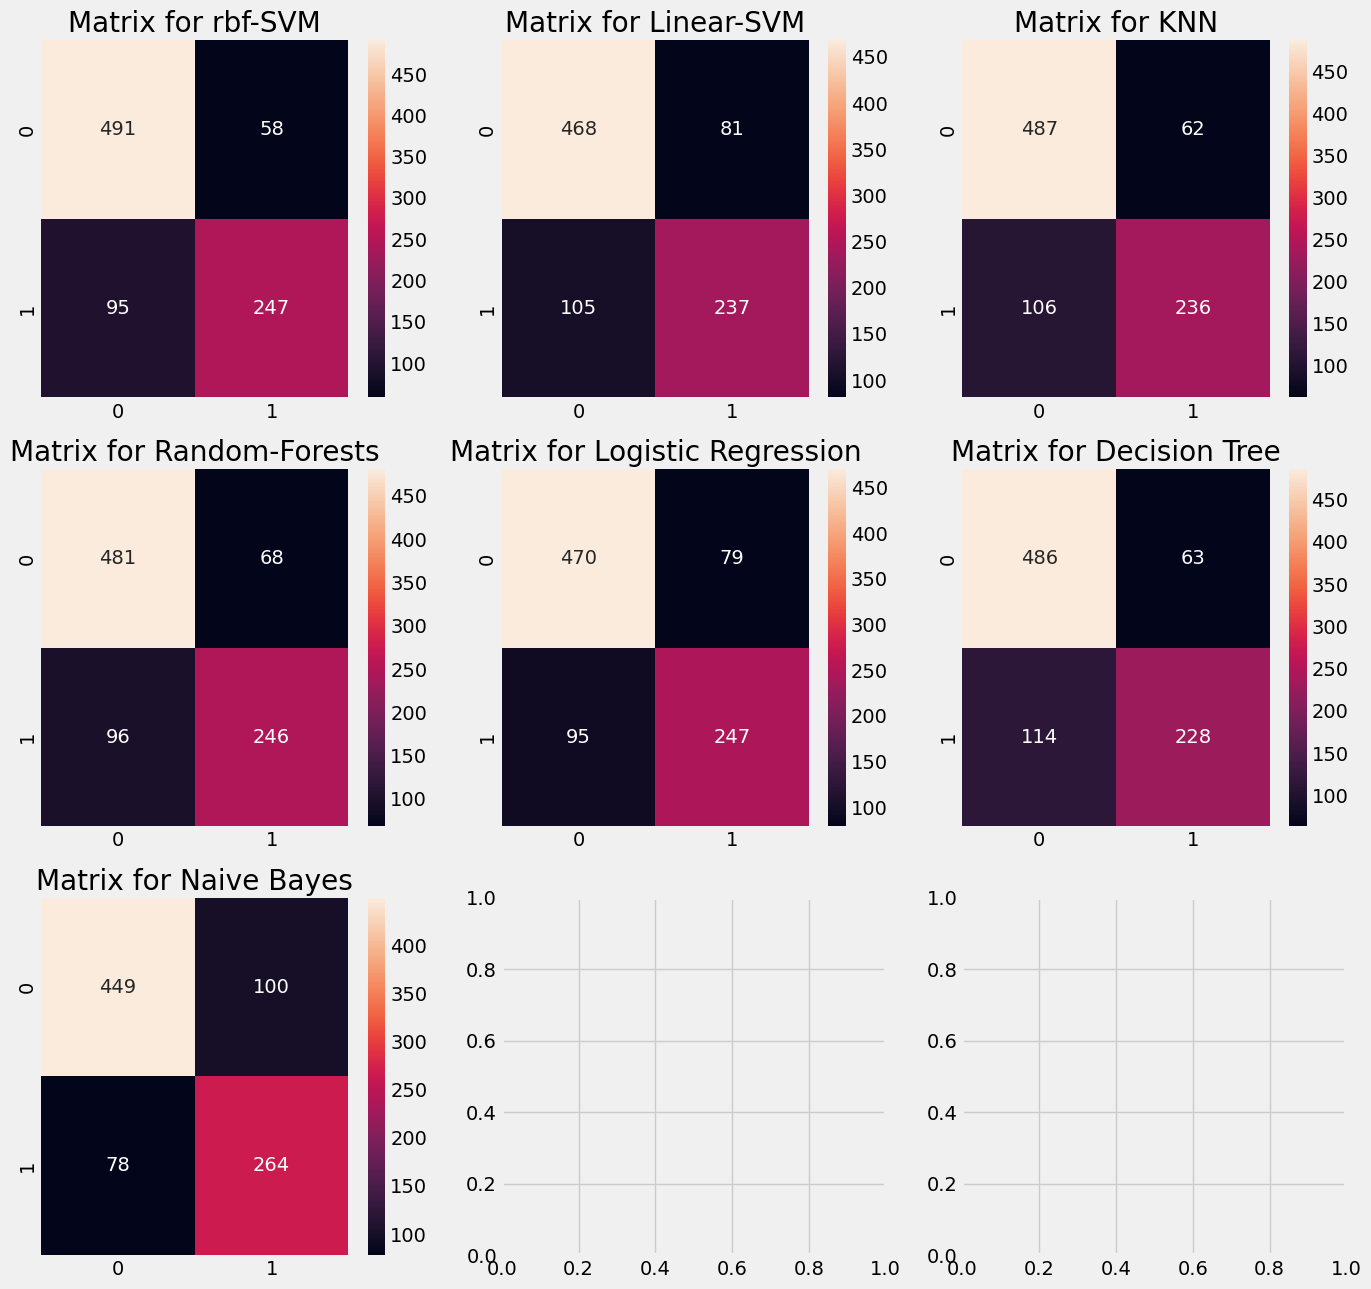

In [74]:
f,ax = plt.subplots(3, 3, figsize = (15,15))

y_pred = cross_val_predict(svm.SVC(kernel = 'rbf'), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0,0], annot=True, fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')

y_pred = cross_val_predict(svm.SVC(kernel = 'linear'), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0,1], annot=True, fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')

y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0,2], annot=True, fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')

y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1,0], annot=True, fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')

y_pred = cross_val_predict(LogisticRegression(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1,1], annot=True, fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')

y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')

y_pred = cross_val_predict(GaussianNB(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax = ax[2,0], annot=True, fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')

plt.subplots_adjust(hspace=0.2, wspace=0.2)
plt.show()

- Confusion Matrix : 각 클래스별 맞춤/오류를 시각화하여 모델의 강점과 약점을 파악
- rbf-SVM : 사망자 예측에 강함
- Naive : 생존자 예측에 강함

### Hyper-Parameters Tuning

**SVM**

In [61]:
from sklearn.model_selection import GridSearchCV
C = [0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel = ['rbf','linear']
hyper = {'kernel':kernel,'C':C,'gamma':gamma}
gd = GridSearchCV(estimator = svm.SVC(), param_grid = hyper, verbose=True)
gd.fit(X, Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
0.8282593685267716
SVC(C=0.4, gamma=0.3)


**Random Forests**

In [62]:
n_estimators = range(100,1000,100)
hyper = {'n_estimators':n_estimators}
gd = GridSearchCV(estimator = RandomForestClassifier(random_state=0), param_grid = hyper, verbose=True)
gd.fit(X, Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.819327098110602
RandomForestClassifier(n_estimators=300, random_state=0)


## Ensembling

### Voting Classifier

In [63]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf = VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                              ('svm',svm.SVC(kernel='linear',probability=True))
                                              ],
                       voting='soft').fit(train_X, train_Y)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(test_X, test_Y))
cross = cross_val_score(ensemble_lin_rbf, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for is', cross.mean())

The accuracy for ensembled model is: 0.8171641791044776
The cross validated score for is 0.8249188514357053


### Bagging

In [64]:
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(estimator = KNeighborsClassifier(n_neighbors=3), random_state=0, n_estimators=700)
model.fit(train_X, train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged model is:', metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for bagged KNN is:', result.mean())

The accuracy for bagged model is: 0.832089552238806
The cross validated score for bagged KNN is: 0.8104244694132333


### Bagged DecisionTree

In [65]:
model = BaggingClassifier(estimator = DecisionTreeClassifier(), random_state=0, n_estimators=100)
model.fit(train_X, train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged Decision Tree is:', metrics.accuracy_score(prediction, test_Y))
result=cross_val_score(model, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:', result.mean())

The accuracy for bagged Decision Tree is: 0.8208955223880597
The cross validated score for bagged Decision Tree is: 0.8171410736579275


### Boosting

In [66]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=200, random_state=0, learning_rate=0.1)
result = cross_val_score(ada, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: 0.8136828963795256


**Stochastic Gradient Boosting**

In [67]:
from sklearn.ensemble import GradientBoostingClassifier
grad = GradientBoostingClassifier(n_estimators=500, random_state=0, learning_rate=0.1)
result = cross_val_score(grad, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for Gradient Boosting is:', result.mean())

The cross validated score for Gradient Boosting is: 0.8115230961298376


**XGBoost**

In [68]:
import xgboost as xg
xgboost = xg.XGBClassifier(n_estimators=900, learning_rate=0.1)
result = cross_val_score(xgboost, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for XGBoost is:',result.mean())

The cross validated score for XGBoost is: 0.8182771535580524


**Hyper-Parameter Tuning for AdaBoost**

In [69]:
n_estimators = list(range(100,1100,100))
learn_rate = [0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper = {'n_estimators':n_estimators, 'learning_rate':learn_rate}
gd = GridSearchCV(estimator = AdaBoostClassifier(), param_grid=hyper, verbose=True)
gd.fit(X, Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
0.8293892411022534
AdaBoostClassifier(learning_rate=0.4, n_estimators=800)


**Confusion Matrix for the Best Model**

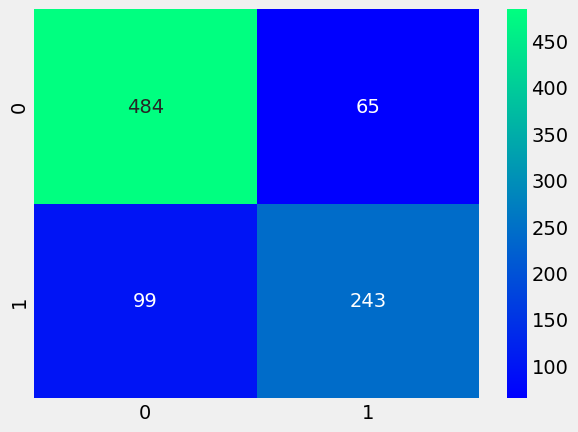

In [70]:
ada=AdaBoostClassifier(n_estimators=200, random_state=0, learning_rate=0.05)
result=cross_val_predict(ada, X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, result), cmap='winter', annot=True, fmt='2.0f')
plt.show()

## Feature Importance

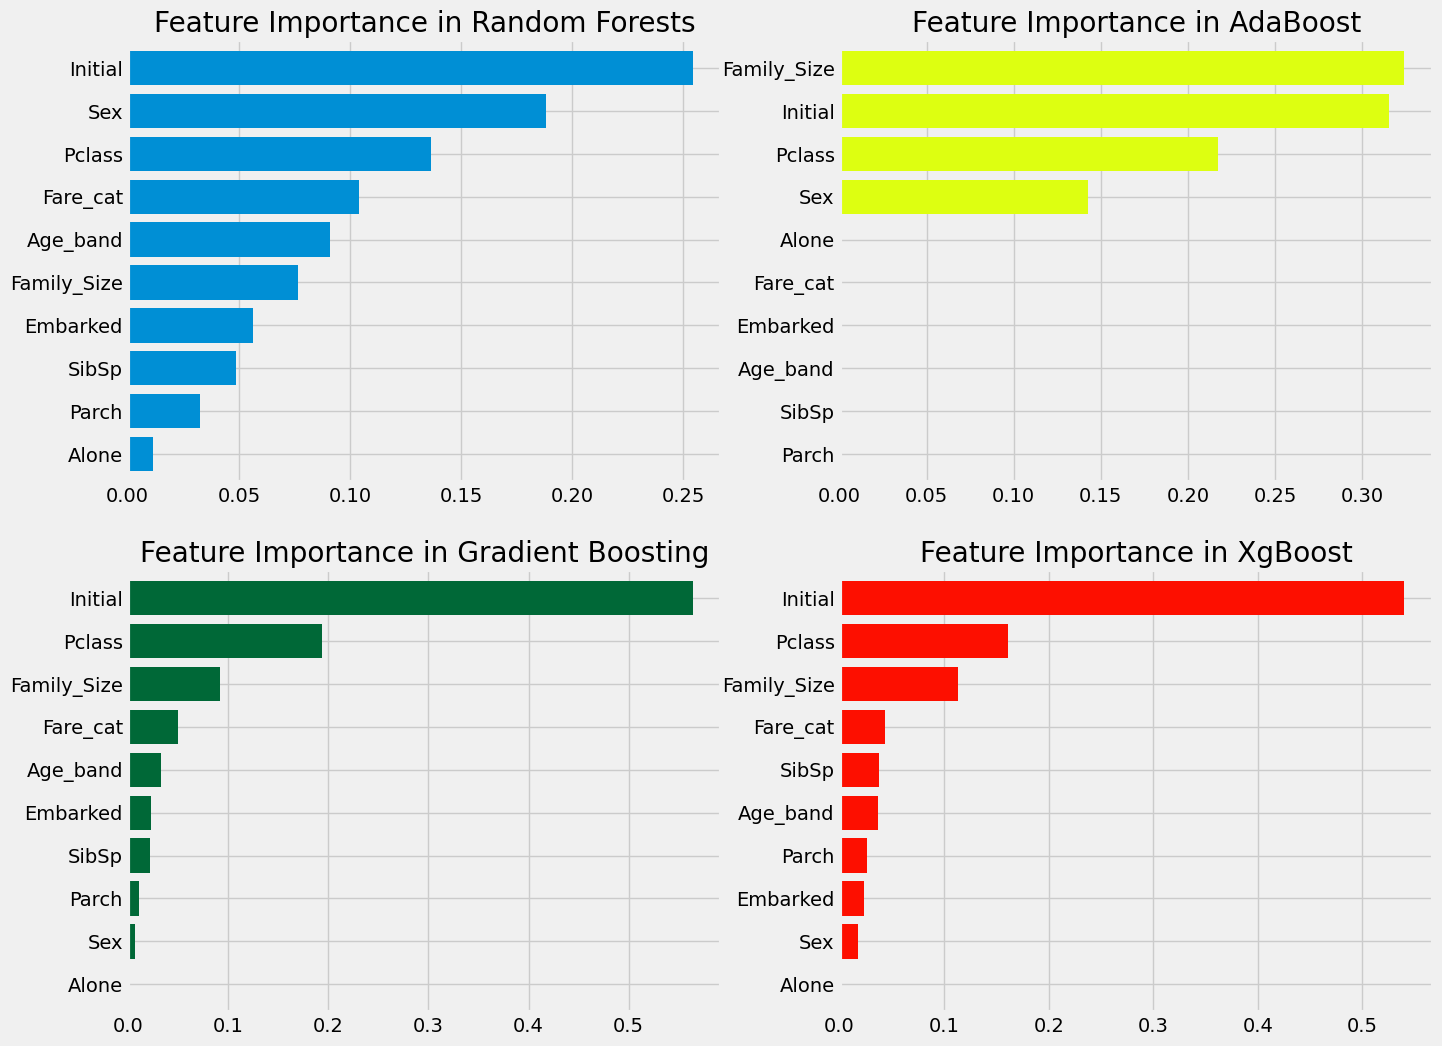

In [71]:
f,ax = plt.subplots(2, 2, figsize=(15,12))
model = RandomForestClassifier(n_estimators=500, random_state=0)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8,
                                                                                       ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')
model = AdaBoostClassifier(n_estimators=200, learning_rate=0.05, random_state=0)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8,
                                                                                      ax=ax[0,1],
                                                                                      color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')
model = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, random_state=0)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8,
                                                                                      ax=ax[1,0],
                                                                                      cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')
model = xg.XGBClassifier(n_estimators=900, learning_rate=0.1)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8,
                                                                                      ax=ax[1,1],
                                                                                      color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')
plt.show()